In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

folder = '../../data/canon'

In [7]:
def check_peptipedia(df):
    df_pivote = pd.read_csv("../../utils/pivoted_sequences_non_filter.csv")
    df["in_peptipedia"] = df["sequence"].isin(df_pivote["sequence"])

    pep_in_peptipedia = df[df["in_peptipedia"] == True]
    pep_in_peptipedia = pd.merge(pep_in_peptipedia, df_pivote, how="inner", on="sequence")
    pep_non_in_peptipedia = df[df["in_peptipedia"] == False]

    return pep_in_peptipedia, pep_non_in_peptipedia

In [8]:
dataframes = {}
# Esto busca todos los archivos CSV en la carpeta 
for archive in os.listdir(folder):
    if archive.endswith('.csv') and os.path.isfile(os.path.join(folder, archive)):
        # Carga el CSV en un DataFrame y agrega al diccionario
        df = pd.read_csv(os.path.join(folder, archive))
        dataframes[archive] = df

# Esto sirve para ver los nombres de los archivos
for nombre, df in dataframes.items():
    print(f'{nombre}:')
    print(df.head(), '\n')

Antiviral_canon.csv:
                                        sequence experimental_characteristics  \
0                                      AAAMSQVTN                    Mammalian   
1                   AACEVAKNLNESLIDLQELGKYEQYIKW                    Mammalian   
2                                      AAGAVVNDL                    Mammalian   
3                           AAHLIDALYAEFLGGRVLTT                    Mammalian   
4  AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA                    Mammalian   

   half_life_seconds  length_sequence hl_category  
0            15840.0                9      Medium  
1            15840.0               28      Medium  
2            15840.0                9      Medium  
3            15840.0               20      Medium  
4            15840.0               45      Medium   

HLP_10_canon.csv:
     sequence experimental_characteristics  half_life_seconds  \
0  GSIGAASMEF          intestinal proteasa             2.7013   
1  IGAASMEFCF          intesti

In [9]:
data_total_pep=pd.DataFrame()
data_total_nopep=pd.DataFrame()

In [10]:
for key in dataframes:
    df = dataframes[key]
    df['source'] = key
    dataset_in_peptipedia, dataset_not_in_peptipedia = check_peptipedia(df)
    data_total_pep=pd.concat([data_total_pep, dataset_in_peptipedia])
    data_total_nopep=pd.concat([data_total_nopep, dataset_not_in_peptipedia])

In [11]:
data_total_pep

,sequence,experimental_characteristics,half_life_seconds,length_sequence,hl_category,source,in_peptipedia,Anti_HIV,Therapeutic,Anti_nematode,...,Anti_human_coronavirus,Anti_human_parainfluenza_virus,Anti_puumala_virus,Anti_amnesic,Cytokine,Anti_hendra_virus,Potentiator,Neuropeptide,Anti_white_spot_syndrome_virus,Anti_herpesviridae
0,AAAMSQVTN,Mammalian,15840.0,9,Medium,Antiviral_canon.csv,True,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,AACEVAKNLNESLIDLQELGKYEQYIKW,Mammalian,15840.0,28,Medium,Antiviral_canon.csv,True,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,AAGAVVNDL,Mammalian,15840.0,9,Medium,Antiviral_canon.csv,True,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,AAHLIDALYAEFLGGRVLTT,Mammalian,15840.0,20,Medium,Antiviral_canon.csv,True,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA,Mammalian,15840.0,45,Medium,Antiviral_canon.csv,True,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,SLRRSSCFGGRMDRIGAQSGLGCNSFRY,human serum,156.0,28,Low,Serum_canon.csv,True,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,MCMPCFTTDHQMARKCDDCCGGKGRGKCYGPQCLCR,mouse,50400.0,36,High,Serum_canon.csv,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,KRFKKFFKKVKKSVKKRLKKIFKKPMVIGVTIPF,human serum,4260.0,34,Low,Serum_canon.csv,True,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,KRFKKFFKKVKKSV,human serum,1260.0,14,Low,Serum_canon.csv,True,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data_total_pep['Therapeutic'].sum()

2335

In [13]:
data_total_pep.groupby("source").size()

source
Antiviral_canon.csv    2181
HLP_10_canon.csv          3
HLP_16_canon.csv          3
PEP_LIFE_canon.csv       85
Plifepred_canon.csv      78
Serum_canon.csv           8
dtype: int64

In [14]:
data_total_nopep

,sequence,experimental_characteristics,half_life_seconds,length_sequence,hl_category,source,in_peptipedia
0,GSIGAASMEF,intestinal proteasa,2.7013,10,Low,HLP_10_canon.csv,False
1,IGAASMEFCF,intestinal proteasa,0.0629,10,Low,HLP_10_canon.csv,False
2,AASMEFCFDV,intestinal proteasa,0.0556,10,Low,HLP_10_canon.csv,False
3,SMEFCFDVFK,intestinal proteasa,0.0103,10,Low,HLP_10_canon.csv,False
4,EFCFDVFKEL,intestinal proteasa,0.0088,10,Low,HLP_10_canon.csv,False
...,...,...,...,...,...,...,...
4,CGMKRTRGC,human serum,14400.0000,9,Medium,Serum_canon.csv,False
5,VSADPSRVNAYKSADSRVNST,human serum,480.0000,21,Low,Serum_canon.csv,False
6,LAEAKGVSAKTALP,trypsin,1380.0000,14,Low,Serum_canon.csv,False
7,SCKNTDSRCKARQLELNERTCRCDKPRR,human plasma,300.0000,28,Low,Serum_canon.csv,False


In [15]:
data_total_nopep.groupby("source").size()

source
HLP_10_canon.csv       186
HLP_16_canon.csv       183
PEP_LIFE_canon.csv     103
Plifepred_canon.csv     98
Serum_canon.csv          9
dtype: int64

In [16]:
grouped=data_total_pep.groupby("source").size()
print("in peptipedia: ", grouped.sum())
grouped

in peptipedia:  2358


source
Antiviral_canon.csv    2181
HLP_10_canon.csv          3
HLP_16_canon.csv          3
PEP_LIFE_canon.csv       85
Plifepred_canon.csv      78
Serum_canon.csv           8
dtype: int64

In [17]:
grup= data_total_nopep.groupby("source").size()
print("not in peptipedia: ", grup.sum())
grup

not in peptipedia:  579


source
HLP_10_canon.csv       186
HLP_16_canon.csv       183
PEP_LIFE_canon.csv     103
Plifepred_canon.csv     98
Serum_canon.csv          9
dtype: int64

In [18]:
count=pd.DataFrame()

In [19]:
count=data_total_pep.sum()
count=count.drop(["sequence", "half_life_seconds", "experimental_characteristics", "source", "in_peptipedia", "hl_category"])
percentage = (count / count.sum()) * 100

In [20]:
count=count.reset_index()
count=count.rename(columns={"index":"category", 0:"count_pep"})

In [21]:
others = 0
for i in range(len(count)):
    num=count.loc[i, 'count_pep']
    if num<=10:
        others=others+num
count.loc[len(count)] = ['others', others]
suma = count.loc[count['category'].isin(['Other', 'others']), 'count_pep'].sum()
count.loc[count['category'] == 'Other', 'count_pep'] = suma

# Eliminar la fila 'others'
count = count[count['category'] != 'others']
gthan = count[count['count_pep'] > 100]

In [22]:
gthan.sort_values(by='count_pep', ascending=True, inplace=True)

/tmp/ipykernel_18890/1425648986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gthan.sort_values(by='count_pep', ascending=True, inplace=True)


In [23]:
gthan

,category,count_pep
25,Metabolic,104
180,Anti_fungal,121
4,Anti_coronaviridae,127
188,Anti_gram_neg,143
18,Anti_herpes_simplex_virus,159
73,Anticancer,164
13,Anti_influenza_virus,182
79,Anti_feline_immunodeficiency_virus,183
213,Anti_herpesviridae,186
75,Anti_orthomyxoviridae,188


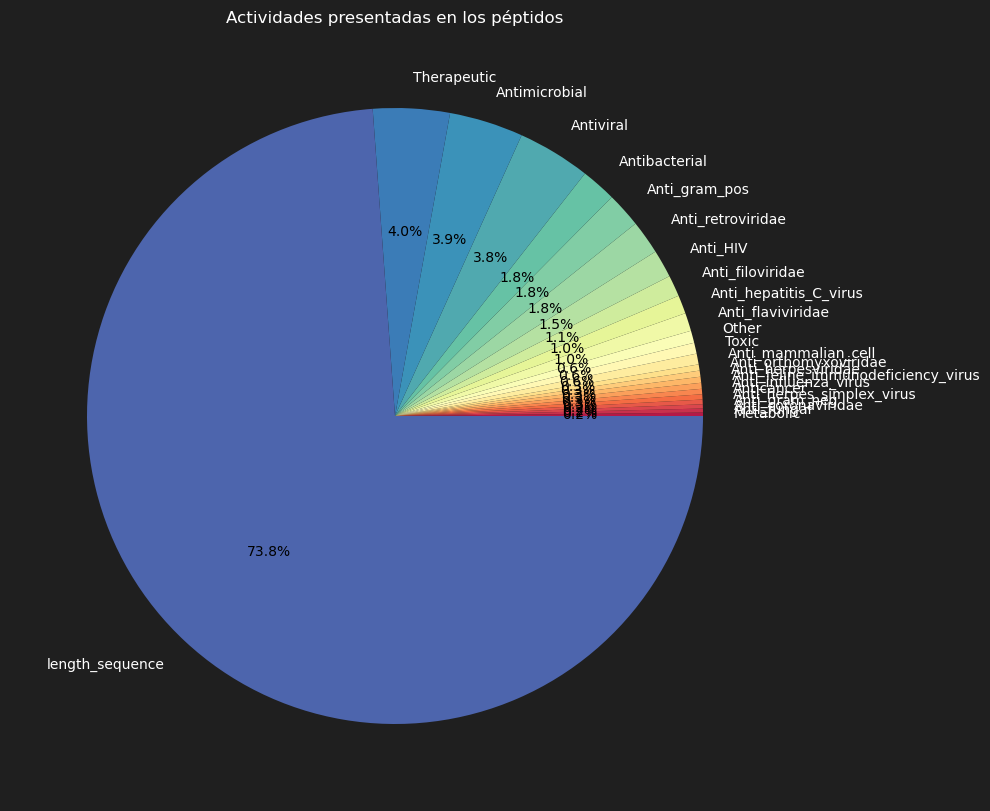

In [24]:
colors = sns.color_palette("Spectral", n_colors=len(gthan))

# Crear el gráfico de pastel
plt.figure(figsize=(10, 10))
plt.gcf().set_facecolor('#1f1f1f')
wedges, texts, autotexts = plt.pie(gthan['count_pep'], labels=gthan['category'], autopct='%1.1f%%', colors=colors, textprops={'color': 'white'})
plt.gca().set_facecolor('#1f1f1f')
for autotext in autotexts:
    autotext.set_color('black')

plt.title("Actividades presentadas en los péptidos", color='white')

plt.savefig("../../img/datasets/peptides_activities.png")
plt.show()